In [1]:
# !pip install geos
# !pip install mpl_toolkits.basemap
# !pip install pyproj

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from PIL import Image
from pylab import rcParams

In [3]:
df = pd.read_csv('2016-12-31.csv')
df.head()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present
0,2016-12-31,-1261,1320,AGO,purse_seines,9.692361,0.0,1
1,2016-12-31,-991,1275,AGO,trawlers,0.191389,0.0,1
2,2016-12-31,-990,1274,AGO,trawlers,0.233611,0.0,1
3,2016-12-31,-985,1272,AGO,trawlers,0.310000,0.0,1
4,2016-12-31,-982,1271,AGO,trawlers,0.235972,0.0,1


In [4]:
df.tail()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present
179471,2016-12-31,-3329,1716,ZAF,drifting_longlines,0.433889,0.433889,1
179472,2016-12-31,-3329,1722,ZAF,drifting_longlines,0.271806,0.178750,1
179473,2016-12-31,-3329,1721,ZAF,drifting_longlines,0.263194,0.175139,1
179474,2016-12-31,-3329,1715,ZAF,drifting_longlines,0.456528,0.456528,1
179475,2016-12-31,-3329,1720,ZAF,drifting_longlines,0.203750,0.203750,1


In [5]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179476 entries, 0 to 179475
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           179476 non-null  object 
 1   lat_bin        179476 non-null  int64  
 2   lon_bin        179476 non-null  int64  
 3   flag           179476 non-null  object 
 4   geartype       179476 non-null  object 
 5   vessel_hours   179476 non-null  float64
 6   fishing_hours  179476 non-null  float64
 7   mmsi_present   179476 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 11.0+ MB
Index(['date', 'lat_bin', 'lon_bin', 'flag', 'geartype', 'vessel_hours',
       'fishing_hours', 'mmsi_present'],
      dtype='object')


In [6]:
print(df.geartype.unique())
print(df.vessel_hours.max())

['purse_seines' 'trawlers' 'drifting_longlines' 'fixed_gear'
 'squid_jigger' 'other_fishing']
910.5144444444439


In [7]:
print(df.flag.unique())

['AGO' 'ALB' 'ARG' 'ATF' 'AUS' 'BEL' 'BGR' 'BHR' 'BLZ' 'BRA' 'CAN' 'CHL'
 'CHN' 'CIV' 'COK' 'COL' 'COM' 'CPV' 'CUW' 'CYP' 'DEU' 'DNK' 'ECU' 'ESP'
 'EST' 'FIN' 'FJI' 'FLK' 'FRA' 'FRO' 'FSM' 'GBR' 'GHA' 'GRC' 'GRL' 'GTM'
 'GUF' 'HKG' 'HRV' 'IDN' 'IND' 'IRL' 'IRN' 'ISL' 'ISR' 'ITA' 'JPN' 'KIR'
 'KNA' 'KOR' 'LBY' 'LTU' 'LVA' 'MAR' 'MDV' 'MEX' 'MHL' 'MLT' 'MNG' 'MOZ'
 'MRT' 'MUS' 'MYS' 'NAM' 'NCL' 'NLD' 'NOR' 'NZL' 'PAN' 'PER' 'PHL' 'PNG'
 'POL' 'PRT' 'PYF' 'QAT' 'REU' 'ROU' 'RUS' 'SEN' 'SGP' 'SHN' 'SLB' 'SLV'
 'SPM' 'SWE' 'SYC' 'TCA' 'THA' 'TUR' 'TWN' 'TZA' 'UKR' 'UNK' 'URY' 'USA'
 'VCT' 'VEN' 'VUT' 'ZAF']


In [8]:
df=df.loc[df.vessel_hours <= 24.0, :]
df=df.loc[df.fishing_hours <= 24.0, :]

In [9]:
df.lat_bin = df.lat_bin/100
df.lon_bin = df.lon_bin/100

In [10]:
PS= df.loc[df.geartype =='purse_seines', :]
TL= df.loc[df.geartype =='trawlers', :]
DL= df.loc[df.geartype =='drifting_longlines', :]
FG= df.loc[df.geartype =='fixed_gear', :]
SJ= df.loc[df.geartype =='squid_jigger', :]
OF= df.loc[df.geartype =='other_fishing', :]

In [11]:
# Count number of vessels of each type

vessel_count = []
vessel_type_ids = [PS,TL,DL,FG,SJ,OF]
for id in vessel_type_ids:
    vessel_count.append(id.geartype.count())
print(vessel_count)

[20912, 66880, 51899, 25798, 7225, 5018]


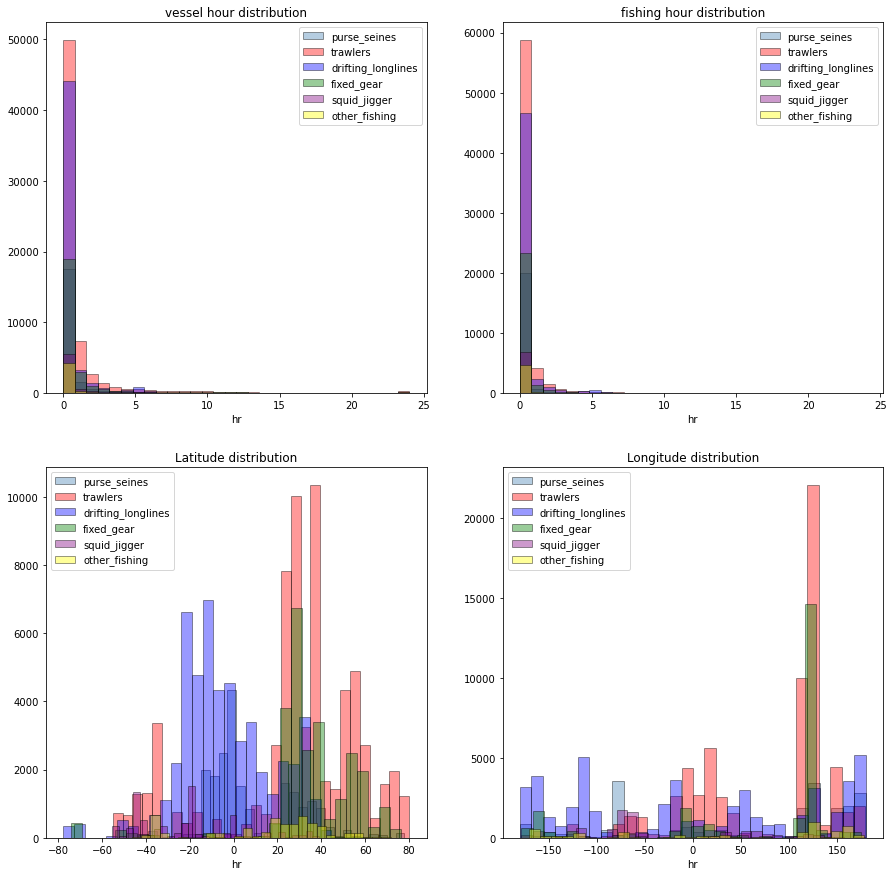

In [12]:
plt.figure(figsize=(15,15))
colors = ["steelblue","red","blue","green","purple","yellow"]
names = df.geartype.unique()
plt.subplot(2, 2, 1)
for i in range(len(vessel_type_ids)):
        vessel_hours_array = vessel_type_ids[i].vessel_hours.to_numpy()
        plt.hist(vessel_hours_array,bins=30,range=[0, 24],color=colors[i],edgecolor='black',alpha =0.4, label= names[i])
plt.title("vessel hour distribution"), plt.xlabel('hr')
plt.legend()

plt.subplot(2, 2, 2)
for i in range(len(vessel_type_ids)):
        fishing_hours_array = vessel_type_ids[i].fishing_hours.to_numpy()
        plt.hist(fishing_hours_array,bins=30,range=[0, 24],color=colors[i],edgecolor='black',alpha =0.4, label= names[i])
plt.title("fishing hour distribution"), plt.xlabel('hr')
plt.legend()

plt.subplot(2, 2, 3)
for i in range(len(vessel_type_ids)):
        lat_array = vessel_type_ids[i].lat_bin.to_numpy()
        plt.hist(lat_array,bins=30,color=colors[i],edgecolor='black',alpha =0.4, label= names[i])
plt.title("Latitude distribution"), plt.xlabel('hr')
plt.legend()

plt.subplot(2, 2, 4)
for i in range(len(vessel_type_ids)):
        lon_array = vessel_type_ids[i].lon_bin.to_numpy()
        plt.hist(lon_array,bins=30,color=colors[i],edgecolor='black',alpha =0.4, label= names[i])
plt.title("Longitude distribution"), plt.xlabel('hr')
plt.legend()

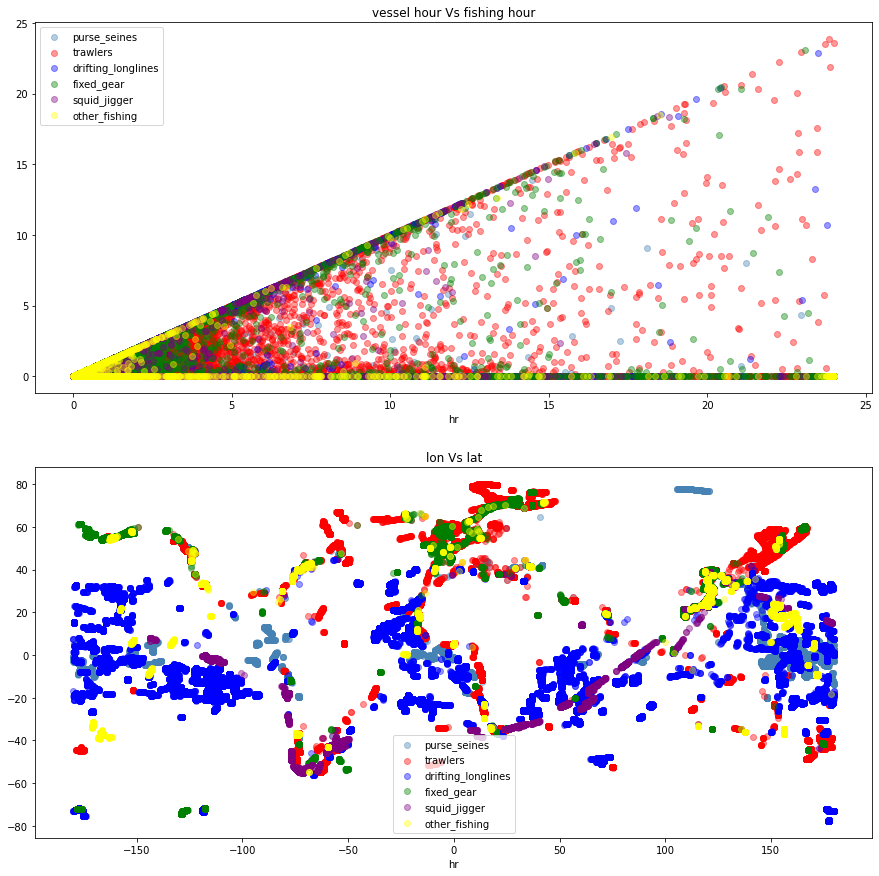

In [13]:
plt.figure(figsize=(15,15))

area = np.pi*20
colors = ["steelblue","red","blue","green","purple","yellow"]
names = df.geartype.unique()

plt.subplot(2, 1, 1)
for i in range(len(vessel_type_ids)):
        vessel_hours_array = vessel_type_ids[i].vessel_hours.to_numpy()
        fishing_hours_array = vessel_type_ids[i].fishing_hours.to_numpy()
        plt.scatter(vessel_hours_array,fishing_hours_array,c=colors[i],alpha =0.4, label= names[i])
plt.title("vessel hour Vs fishing hour"), plt.xlabel('hr')
plt.legend()

plt.subplot(2, 1, 2)
for i in range(len(vessel_type_ids)):
        lon_array = vessel_type_ids[i].lon_bin.to_numpy()
        lat_array = vessel_type_ids[i].lat_bin.to_numpy()
        plt.scatter(lon_array,lat_array,c=colors[i],alpha =0.4, label= names[i])
plt.title("lon Vs lat"), plt.xlabel('hr')
plt.legend()



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


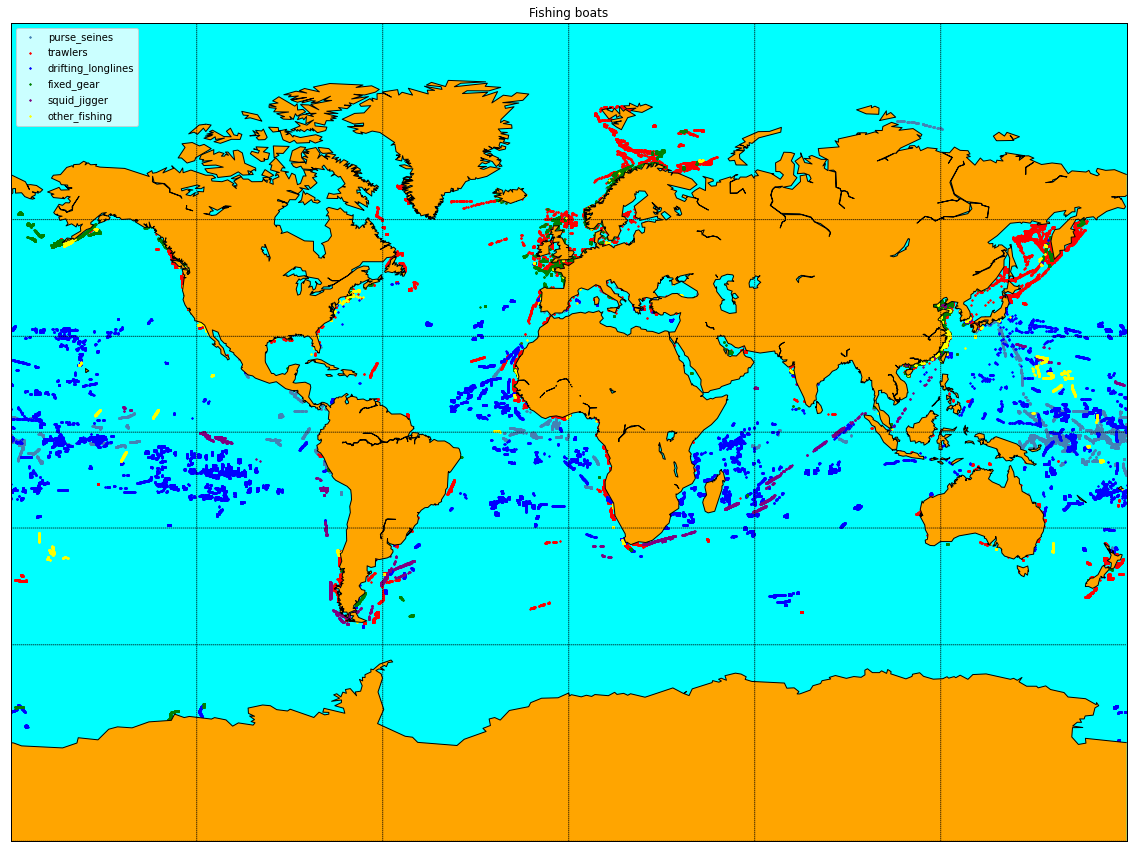

In [14]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

for i in range(len(vessel_type_ids)):
        lon_array = vessel_type_ids[i].lon_bin.to_numpy()
        lat_array = vessel_type_ids[i].lat_bin.to_numpy()
        x,y = m(lon_array,lat_array)
        m.scatter(x,y,color=colors[i],marker='D',label=names[i],s=np.pi/2)
plt.title("Fishing boats")
plt.legend()
plt.show()
#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)

In [15]:
# Focus on a region

llat=-14
ulat=51
llon=46
ulon=151

df=df[(df['lon_bin']>llon) & (df['lon_bin']<ulon) & 
      (df['lat_bin']>llat) & (df['lat_bin']<ulat)]
print("Number of final datapoints:",len(df))

vessel_type_ids = [PS,TL,DL,FG,SJ,OF]
colors = ["steelblue","red","blue","green","purple","yellow"]
names = df.geartype.unique()

PS= df.loc[df.geartype =='purse_seines', :]
TL= df.loc[df.geartype =='trawlers', :]
DL= df.loc[df.geartype =='drifting_longlines', :]
FG= df.loc[df.geartype =='fixed_gear', :]
SJ= df.loc[df.geartype =='squid_jigger', :]
OF= df.loc[df.geartype =='other_fishing', :]

Number of final datapoints: 68083


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


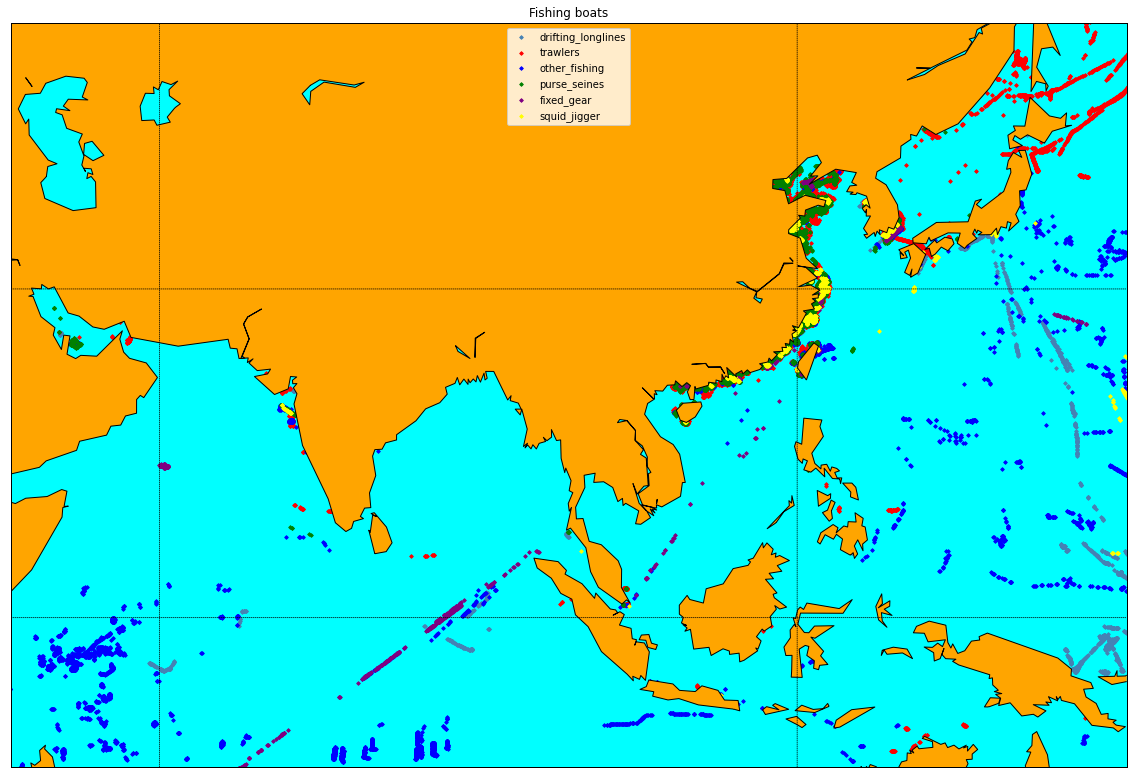

In [16]:
plt.figure(figsize=(20,15))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

for i in range(len(vessel_type_ids)):
        lon_array = vessel_type_ids[i].lon_bin.to_numpy()
        lat_array = vessel_type_ids[i].lat_bin.to_numpy()
        x,y = m(lon_array,lat_array)
        m.scatter(x,y,color=colors[i],marker='D',label=names[i],s=np.pi*2)
plt.title("Fishing boats")
plt.legend()
plt.show()